#Drive Authentication

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import logging
logging.basicConfig(level=logging.ERROR)

#Reading the dataset

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Dlops project/IMDB Dataset.csv")

In [ ]:
df = df.iloc[:1000,:]

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
len(df)

1000

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.sentiment.value_counts()

positive    501
negative    499
Name: sentiment, dtype: int64

#Train test split

In [ ]:
df_positive = df[df.sentiment=="positive"]
df_negative = df[df.sentiment=="negative"]


In [ ]:
print(len(df_positive))
print(len(df_negative))

501
499


In [ ]:
from sklearn.model_selection import train_test_split
X_pos = df_positive.review
y_pos = df_positive.sentiment
X_train_pos, X_test_pos, y_train_pos, y_test_pos = train_test_split(X_pos, y_pos, test_size=0.4, random_state=42)

X_neg = df_negative.review
y_neg = df_negative.sentiment
X_train_neg, X_test_neg, y_train_neg, y_test_neg = train_test_split(X_neg, y_neg, test_size=0.4, random_state=42)


In [ ]:
X_train = X_train_pos.append(X_train_neg, ignore_index=True)
X_test = X_test_pos.append(X_test_neg, ignore_index=True)
y_train = y_train_pos.append(y_train_neg, ignore_index=True)
y_test = y_test_pos.append(y_test_neg, ignore_index=True)


In [ ]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

599 401 599 401


In [ ]:
review_list_train = list(X_train)
sentiment_list_train = list(y_train)
df_train = pd.DataFrame(list(zip(review_list_train, sentiment_list_train)),
               columns =['review', 'sentiment'])
print(df_train.head)
df_train = df_train.sample(frac = 1)

<bound method NDFrame.head of                                                 review sentiment
0    I had before a feeling of mislike for all Russ...  positive
1    Overall I was rather impressed with the pilot....  positive
2    This film held my interest enough to watch it ...  positive
3    Riding high on the success of "Rebel Without a...  positive
4    If you like Sci-Fi, Monsters, and Ancient Lege...  positive
..                                                 ...       ...
594  A very ordinary made-for-tv product, "Tyson" a...  negative
595  The story and the show were good, but it was r...  negative
596  Time is precious. This film isn't. I must lear...  negative
597  The Quick and the Undead is, finally, the firs...  negative
598  This movie was a failure as a comedy and a fil...  negative

[599 rows x 2 columns]>


In [ ]:
review_list_test = list(X_test)
sentiment_list_test = list(y_test)
df_valid = pd.DataFrame(list(zip(review_list_test, sentiment_list_test)),
               columns =['review', 'sentiment'])

df_valid = df_valid.sample(frac = 1)

In [ ]:
print(len(df_train))
print(len(df_valid))

599
401


In [ ]:
df_valid

,review,sentiment
275,It is incredible that there were two films wit...,negative
239,Coen Brothers-wannabe from writer-director Pau...,negative
263,it got switched off before the opening credits...,negative
188,"i am finally seeing the El Padrino movie, from...",positive
143,"This movie really woke me up, like it wakes up...",positive
...,...,...
362,"Pepe le Moko, played by Charles Boyer, is some...",negative
86,For his first ever debut this film has some ri...,positive
78,This PM Entertainment production is laced with...,positive
111,"So real and surreal, all in one. I remember fe...",positive


In [ ]:
sentiment_mapping = {
    'positive': 0,
    'negative': 1,
}
df_train['sentiment'] = df_train['sentiment'].map(sentiment_mapping)
df_valid['sentiment'] = df_valid['sentiment'].map(sentiment_mapping)


df_train = df_train.reset_index(drop=True)
df_valid = df_valid.reset_index(drop=True)

In [ ]:
df_train.tail()

,review,sentiment
594,Attractive Marjorie(Farrah Fawcett)lives in fe...,0
595,Savage Island (2003) is a lame movie. It's mor...,1
596,These slasher pics are past their sell by date...,0
597,What can I say? Not as bad as many here have m...,0
598,Now I don't hate cheap movies. I just don't se...,1


In [ ]:
df_valid.head()

,review,sentiment
0,It is incredible that there were two films wit...,1
1,Coen Brothers-wannabe from writer-director Pau...,1
2,it got switched off before the opening credits...,1
3,"i am finally seeing the El Padrino movie, from...",0
4,"This movie really woke me up, like it wakes up...",0


#Data Distribution

In [ ]:
df.sentiment.value_counts()

positive    501
negative    499
Name: sentiment, dtype: int64

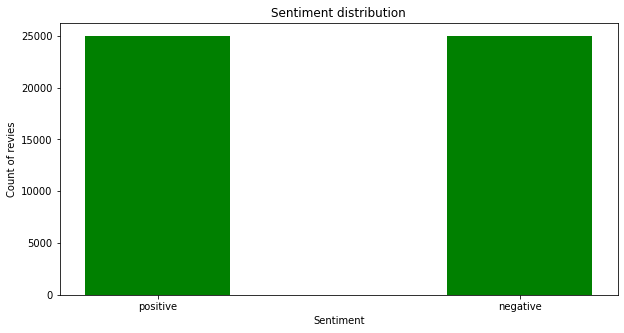

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
distribution = dict(df.sentiment.value_counts())
sentiments = distribution.keys()
counts = distribution.values()
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(sentiments, counts, color ='green',
        width = 0.4)
 
plt.xlabel("Sentiment")
plt.ylabel("Count of revies")
plt.title("Sentiment distribution")
plt.show()

In [ ]:
!pip install transformers==3.0.0

#Importing Libraries

In [ ]:
#@title Importing Libraries

import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.optim import lr_scheduler
from bs4 import BeautifulSoup 

import pandas as pd
import numpy as np
import os
import shutil

import logging
logging.basicConfig(level=logging.ERROR)

#import warnings
#warnings.filterwarnings("ignore")

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")


Device: cuda:0


#Sentiment Classifier
This class defines the model architecture which is simply a fully-connected
layer on top of a pre-trained BERT model.

In [ ]:
class SentimentClassifier(nn.Module):
  """
  This class defines the model architecture which is simply a fully-connected
  layer on top of a pre-trained BERT model. 
  """

  def __init__(self, BERT_MODEL):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(BERT_MODEL)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, 2) # Number of output classes = 2

  def forward(self, ids, mask, token_type_ids):
    last_hidden_state, pooled_output = self.bert(ids, attention_mask=mask, token_type_ids=token_type_ids)
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
from torchsummary import summary
BERT_MODEL = 'bert-base-uncased'
model = SentimentClassifier(BERT_MODEL)
model = model.to(device)


#

#Model

In [ ]:
print(model)

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

#Utiliti Tokenizer
This class tokenizes the input text using the pre-trained BERT tokenizer (wordpiece) and returns the corresponding tensors.

In [ ]:
class util_tokenizer:
  """
  This class tokenizes the input text using the pre-trained BERT tokenizer 
  (wordpiece) and returns the corresponding tensors.
  """

  def __init__(self, text, targets, tokenizer, max_len):
    self.text = text
    self.tokenizer = tokenizer
    self.max_len = max_len
    self.targets = targets

  def __len__(self):
    return len(self.targets)
  
  def __getitem__(self, item):
    text = str(self.text[item])
    targets = self.targets[item]

    inputs = self.tokenizer.encode_plus(
        text,
        add_special_tokens = True,
        max_length = self.max_len,
        pad_to_max_length = True
    )

    ids = inputs["input_ids"]
    mask = inputs["attention_mask"]
    token_type_ids = inputs["token_type_ids"]

    return {
        "ids": torch.tensor(ids, dtype=torch.long),
        "mask": torch.tensor(mask, dtype=torch.long),
        "token_type_ids": torch.tensor(token_type_ids, dtype=torch.long),
        "targets": torch.tensor(targets, dtype=torch.long)
    }

#Loss Function

In [ ]:
def loss_function(outputs, targets):
	"""
	This function defines the loss function which is used to train the model, i.e.
	CrossEntropy.
	"""
	return nn.CrossEntropyLoss(reduction='mean')(outputs, targets)

#Train Function
This function defines the training loop over the entire training set.

In [ ]:
def train_loop_function(data_loader, model, optimizer, device):
  """
  This function defines the training loop over the entire training set.
  """

  model.train()
  loss_list =[]
  running_loss = 0.0
  count=0
  for bi, d in enumerate(data_loader):
    #print(bi)
    #print(d)
    if(count%100 ==0):
      print(count,"count")
    count+=1
    ids = d["ids"]
    mask = d["mask"]
    token_type_ids = d["token_type_ids"]
    targets = d["targets"]
    #print(ids,mask,token_type_ids,targets)

    ids = ids.to(device, dtype=torch.long)
    mask = mask.to(device, dtype=torch.long)
    token_type_ids = token_type_ids.to(device, dtype=torch.long)
    targets = targets.to(device, dtype=torch.long)


    optimizer.zero_grad()

    outputs = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
    loss = loss_function(outputs, targets)

    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if bi % 10 == 0 and bi!=0:
      temp = f'Batch index = {bi}\tLoss = {running_loss/10}'
      loss_list.append(running_loss/10)
      running_loss = 0.0
  return loss_list


#Evaluation Function
This function defines the evaluation loop over the entire validation set.
It also computes accuracy of the trained model, which is used to select the 
best model.

In [ ]:
def eval_loop_function(data_loader, model, device):
  """
  This function defines the evaluation loop over the entire validation set.
  It also computes accuracy of the trained model, which is used to select the 
  best model.
  """

  model.eval()

  corrects = 0
  total = 0
  for bi, d in enumerate(data_loader):
    ids = d["ids"]
    mask = d["mask"]
    token_type_ids = d["token_type_ids"]
    targets = d["targets"]

    ids = ids.to(device, dtype=torch.long)
    mask = mask.to(device, dtype=torch.long)
    token_type_ids = token_type_ids.to(device, dtype=torch.long)
    targets = targets.to(device, dtype=torch.long)

    outputs = model(ids=ids, mask=mask, token_type_ids=token_type_ids)

    _, predicted = torch.max(outputs, 1)
    total = total + targets.size(0)
    corrects = corrects + (predicted==targets).sum().item()

    #print(f"bi: {bi}\tPredicted: {predicted}\tTargets: {targets}")

  accuracy = corrects / total * 100
  return accuracy

#Training the model

In [ ]:
def run(df_train,df_valid):
  """
  This function defines hyperparameters, model and optimizer, loads required
  datasets and initiate the training and validation procedures.
  """
  epoch_loss_list=[]
  epoch_accuracy=[]
  final_model=None

  TRAIN_MAX_LEN = 140
  VALID_MAX_LEN = 140
  TRAIN_BATCH_SIZE = 16
  VALID_BATCH_SIZE = 16
  EPOCHS = 5
  BERT_MODEL = 'bert-base-uncased'
  LEARNING_RATE = 3e-5

  tokenizer = transformers.BertTokenizer.from_pretrained(BERT_MODEL)

  train_dataset = util_tokenizer(
      text = df_train['review'].values,
      targets = df_train['sentiment'].values,
      tokenizer = tokenizer,
      max_len = TRAIN_MAX_LEN
  )


  class_counts = []
  for i in range(2):
    class_counts.append(df_train[df_train['sentiment']==i].shape[0])
  
  
  num_samples = sum(class_counts)
  labels = df_train['sentiment'].values
  class_counts=list(class_counts)
  class_weights = []

  for i in range(2):

    if class_counts[i] != 0:
      class_weights.append(num_samples/class_counts[i])
    else:
      class_weights.append(0)

  weights = [class_weights[labels[i]] for i in range(int(num_samples))]
  sampler = torch.utils.data.sampler.WeightedRandomSampler(torch.DoubleTensor(weights), int(num_samples))


  train_data_loader = torch.utils.data.DataLoader(
      train_dataset,
      batch_size = TRAIN_BATCH_SIZE,
      shuffle = False,
      sampler = sampler
  )

  valid_dataset = util_tokenizer(
      text = df_valid['review'].values,
      targets = df_valid['sentiment'].values,
      tokenizer = tokenizer,
      max_len = VALID_MAX_LEN
  )

  valid_data_loader = torch.utils.data.DataLoader(
      valid_dataset,
      batch_size = VALID_BATCH_SIZE,
      shuffle = False
  )

  model = SentimentClassifier(BERT_MODEL)
  model = model.to(device)

  num_train_steps = int(len(train_dataset) / TRAIN_BATCH_SIZE * EPOCHS)
  optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

  scheduler = lr_scheduler.StepLR(
      optimizer,
      step_size = 1,
      gamma = 0.8
  )
  max_accuracy=-999

  for epoch in range(EPOCHS):
        print("Epoch : ",epoch,sep=" ")
        
        loss_list= train_loop_function(data_loader=train_data_loader, model=model, optimizer=optimizer, device=device)
      
        accuracy = eval_loop_function(data_loader=valid_data_loader, model=model, device=device)
        epoch_loss_list.append(loss_list)
        epoch_accuracy.append(accuracy)
        #accuracy_aspect_wise.append(accuracy)
        if accuracy>max_accuracy :
                max_accuracy=accuracy
                final_model = model
                model_name = '/content/drive/MyDrive/DLOPS_project'+ '/'+ str(epoch) + '.bin'
                #epoch , accuracy in that epoch, loss batch wise 
                #accuracy_dict[aspect]= [epoch,accuracy,loss_list]

        print(f"\nEpoch = {epoch}\tAccuracy Score = {accuracy}")
        print(f"Learning Rate = {scheduler.get_lr()[0]}\n")
        print("loss_list ",loss_list,sep= " ")

        scheduler.step()

  torch.save(final_model.state_dict(),model_name)     
  return epoch_loss_list,epoch_accuracy


In [ ]:
if __name__ == "__main__":
  epoch_loss_list,epoch_accuracy = run(df_train,df_valid)

Epoch :  0
Train Loop
Iteration 0 Loss 1.0711952447891235
Iteration 100 Loss 0.4316503405570984
Iteration 200 Loss 0.26546552777290344
Iteration 300 Loss 0.22568006813526154
Iteration 400 Loss 0.12127146124839783
Iteration 500 Loss 0.38499605655670166
Iteration 600 Loss 0.2438974678516388
Iteration 700 Loss 0.3392295837402344
Iteration 800 Loss 0.44453632831573486
Iteration 900 Loss 0.6335721015930176
Iteration 1000 Loss 0.4639115631580353
Iteration 1100 Loss 0.26569733023643494
Iteration 1200 Loss 0.25288426876068115
Iteration 1300 Loss 0.12764817476272583
Iteration 1400 Loss 0.3234763741493225
Iteration 1500 Loss 0.35244235396385193
Iteration 1600 Loss 0.2062813639640808
Iteration 1700 Loss 0.18029427528381348
Iteration 1800 Loss 0.22197669744491577

Epoch = 0	Accuracy Score = 88.47
Learning Rate = 3e-05

loss_list  [0.9767411470413208, 0.7653391242027283, 0.743639075756073, 0.7123958528041839, 0.6443391561508178, 0.5642549753189087, 0.3898644521832466, 0.41001539677381516, 0.4197576

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:372: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


Iteration 0 Loss 0.3225958049297333
Iteration 100 Loss 0.3749157190322876
Iteration 200 Loss 0.12199568003416061
Iteration 300 Loss 0.04196774587035179
Iteration 400 Loss 0.03675088658928871
Iteration 500 Loss 0.3476121127605438
Iteration 600 Loss 0.31324392557144165
Iteration 700 Loss 0.49062299728393555
Iteration 800 Loss 0.05823909863829613
Iteration 900 Loss 0.36205556988716125
Iteration 1000 Loss 0.17896635830402374
Iteration 1100 Loss 0.3743111193180084
Iteration 1200 Loss 0.08851179480552673
Iteration 1300 Loss 0.20544175803661346
Iteration 1400 Loss 0.325318843126297
Iteration 1500 Loss 0.07994962483644485
Iteration 1600 Loss 0.08884931355714798
Iteration 1700 Loss 0.4851783514022827
Iteration 1800 Loss 0.13645219802856445

Epoch = 1	Accuracy Score = 88.91
Learning Rate = 1.9200000000000003e-05

loss_list  [0.2243881668895483, 0.14863150790333748, 0.1239036813378334, 0.23277650251984597, 0.14887059964239596, 0.18678105846047402, 0.11946671828627586, 0.17593336142599583, 0.23963

#Performance Ananlysis

In [ ]:
len(epoch_loss_list)
loss_epoch =[]
for i in range(len(epoch_loss_list)):
  loss_epoch.append(sum(epoch_loss_list[i])/len(epoch_loss_list[i]))

loss_epoch

[0.27982749256011563,
 0.15223233753536397,
 0.09003073877273968,
 0.054190723233131594,
 0.032241830911162395]

In [ ]:
num_epoch =[0,1,2,3,4]
epoch_accuracy

[88.47, 88.91, 89.005, 89.18, 89.725]

In [ ]:
import matplotlib.pyplot as plt
 
def model_plot(x,y,title):

  plt.plot(x, y)
  plt.xlabel('epoch')
  plt.ylabel('Accuracy')
  plt.title(title)
  plt.show()

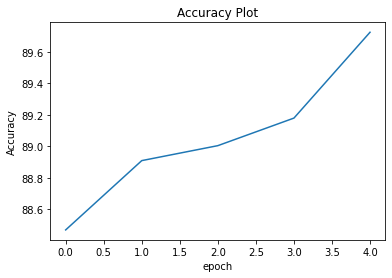

In [ ]:
model_plot(num_epoch,epoch_accuracy,"Accuracy Plot")

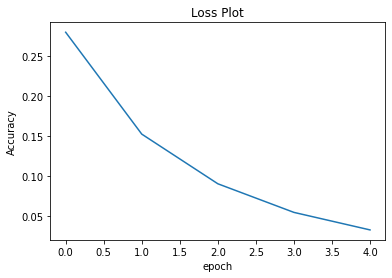

In [ ]:
model_plot(num_epoch,loss_epoch,"Loss Plot")

In [ ]:
from tabulate import tabulate
 
# assign data
mydata =[]
for i in range(len(epoch_accuracy)):
  mydata.append([num_epoch[i],epoch_accuracy[i]])

# create header
head = ["Epoch", "Accuracy"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+---------+------------+
|   Epoch |   Accuracy |
+=========+============+
|       0 |     88.47  |
+---------+------------+
|       1 |     88.91  |
+---------+------------+
|       2 |     89.005 |
+---------+------------+
|       3 |     89.18  |
+---------+------------+
|       4 |     89.725 |
+---------+------------+


In [ ]:
mydata1 =[]
for i in range(len(loss_epoch)):
  mydata1.append([num_epoch[i],loss_epoch[i]])

# create header
head = ["Epoch", "Loss"]
 
# display table
print(tabulate(mydata1, headers=head, tablefmt="grid"))

+---------+-----------+
|   Epoch |      Loss |
+=========+===========+
|       0 | 0.279827  |
+---------+-----------+
|       1 | 0.152232  |
+---------+-----------+
|       2 | 0.0900307 |
+---------+-----------+
|       3 | 0.0541907 |
+---------+-----------+
|       4 | 0.0322418 |
+---------+-----------+


#ONNX model

In [ ]:
pip install onnx

#Loaded the trained bert model.

In [ ]:
path ='/content/drive/MyDrive/DLOPS_project/3.bin'
model = SentimentClassifier(BERT_MODEL)
model.load_state_dict(torch.load(path))

model

SentimentClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affin

In [ ]:

TRAIN_MAX_LEN = 140
VALID_MAX_LEN = 140
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
EPOCHS = 5
BERT_MODEL = 'bert-base-uncased'
LEARNING_RATE = 3e-5
tokenizer = transformers.BertTokenizer.from_pretrained(BERT_MODEL)

train_dataset = util_tokenizer(
    text = df_train['review'].values,
    targets = df_train['sentiment'].values,
    tokenizer = tokenizer,
    max_len = TRAIN_MAX_LEN
)


train_data_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size = TRAIN_BATCH_SIZE,
    shuffle = False,
)


for bi, d in enumerate(train_data_loader):
  ids = d["ids"]
  mask = d["mask"]
  token_type_ids = d["token_type_ids"]
  targets = d["targets"]
  break

#Converting in onnx

In [ ]:

# Input to the model

x = (ids,mask,token_type_ids)

# Export the model
torch.onnx.export(model,                      # model being run
                  x,                          # model input (or a tuple for multiple inputs)                       
                  "/content/drive/MyDrive/DLOPS_project/sentiment_bert.onnx", # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                  )
print("successfully converted to onnx")


#onnx.checker.check_model(onnx_model)


successfully converted to onnx


#Inferencing on Pytorch

In [ ]:
text = "The movie was initially boring but it was good in the second half and I didn't find the plot of the movie interesting"
#text_neg ="The move was so bad"

In [ ]:
import time
BERT_MODEL = 'bert-base-uncased'
MAX_LEN = 160

start = time.time()
tokenizer = transformers.BertTokenizer.from_pretrained(BERT_MODEL)
text = text.strip()


inputs = tokenizer.encode_plus(
    text,
    add_special_tokens = True,
    max_length = MAX_LEN,
    pad_to_max_length = True
)
ids = torch.tensor(inputs["input_ids"], dtype=torch.long).unsqueeze(0)
mask = torch.tensor(inputs["attention_mask"], dtype=torch.long).unsqueeze(0)
token_type_ids = torch.tensor(inputs["token_type_ids"], dtype=torch.long).unsqueeze(0)

ids = ids.to(device, dtype=torch.long)
mask = mask.to(device, dtype=torch.long)
token_type_ids = token_type_ids.to(device, dtype=torch.long)

path = '/content/drive/MyDrive/DLOPS_project/3.bin'
model = SentimentClassifier(BERT_MODEL)
model.load_state_dict(torch.load(path))
model = model.to(device)


outputs = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
#print(outputs)


_, predicted = torch.max(outputs, 1)

#print(predicted)
predicted = predicted.detach().cpu().numpy()
predict_sentiment=predicted[0]
predict_score=outputs[0][predict_sentiment].item()
#print(predict_score)

print("PyTorch Inference time = {} ms".format(time.time() - start))
if predict_sentiment ==0:
  print("The sentiment is positive")
else:
  print("The sentiment is negative")


  


PyTorch Inference time = 5.874268054962158 ms
The sentiment is negative


In [ ]:
#text = "The movie was so good, I really liked it"
text_neg ="The move was extremely bad"

In [ ]:
import time
BERT_MODEL = 'bert-base-uncased'
MAX_LEN = 160

start = time.time()
tokenizer = transformers.BertTokenizer.from_pretrained(BERT_MODEL)
text_neg = text_neg.strip()


inputs = tokenizer.encode_plus(
    text,
    add_special_tokens = True,
    max_length = MAX_LEN,
    pad_to_max_length = True
)
ids = torch.tensor(inputs["input_ids"], dtype=torch.long).unsqueeze(0)
mask = torch.tensor(inputs["attention_mask"], dtype=torch.long).unsqueeze(0)
token_type_ids = torch.tensor(inputs["token_type_ids"], dtype=torch.long).unsqueeze(0)

ids = ids.to(device, dtype=torch.long)
mask = mask.to(device, dtype=torch.long)
token_type_ids = token_type_ids.to(device, dtype=torch.long)

path = '/content/drive/MyDrive/DLOPS_project/3.bin'
model = SentimentClassifier(BERT_MODEL)
model.load_state_dict(torch.load(path))
model = model.to(device)


outputs = model(ids=ids, mask=mask, token_type_ids=token_type_ids)
#print(outputs)


_, predicted = torch.max(outputs, 1)

#print(predicted)
predicted = predicted.detach().cpu().numpy()
predict_sentiment=predicted[0]
predict_score=outputs[0][predict_sentiment].item()
#print(predict_score)

print("PyTorch Inference time = {} ms".format(time.time() - start))
if predict_sentiment ==0:
  print("The sentiment is positive")
else:
  print("The sentiment is negative")


  


PyTorch Inference time = 8.51868724822998 ms
The sentiment is negative
